In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [8]:
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Pass':       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)
print("=== Original Dataset ===")
print(df)


=== Original Dataset ===
   StudyHours  Pass
0           1     0
1           2     0
2           3     0
3           4     0
4           5     1
5           6     1
6           7     1
7           8     1
8           9     1
9          10     1


In [9]:
X = df[['StudyHours']]  # Independent variable
y = df['Pass']          # Dependent variable



=== Model Evaluation ===
Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



C:\Users\riyad\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


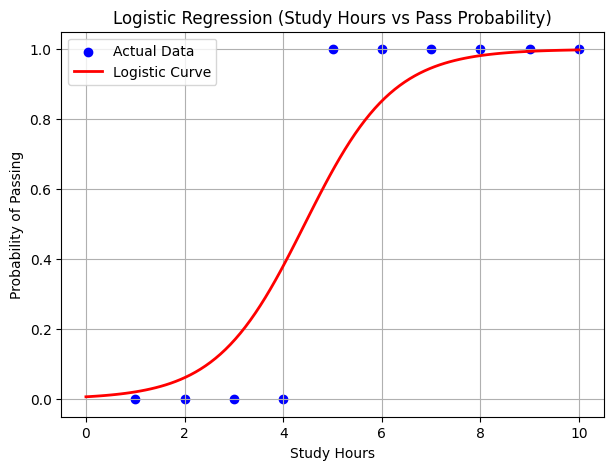

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Predict on test data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Step 7: Evaluate performance
print("\n=== Model Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Visualize sigmoid curve
X_values = np.linspace(0, 10, 100).reshape(-1, 1)
Y_prob = model.predict_proba(X_values)[:, 1]

plt.figure(figsize=(7,5))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_values, Y_prob, color='red', linewidth=2, label='Logistic Curve')
plt.title('Logistic Regression (Study Hours vs Pass Probability)')
plt.xlabel('Study Hours')
plt.ylabel('Probability of Passing')
plt.legend()
plt.grid(True)
plt.show()
